In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.io as sio
import h5py
import scipy.signal as scisig
import importlib
import analysis_utils as au
import cmath

In [5]:
filename = r'D:\Lab Data\lorentz_force\sphere20250507\20250519\2.5 V\Background\tt719.hdf5'
data, attrs = au.load_data_lf(filename)
PSD = scisig.welch(data['channel_d'], fs = 1/attrs['delta_t'], nperseg = int(1/attrs['delta_t']))

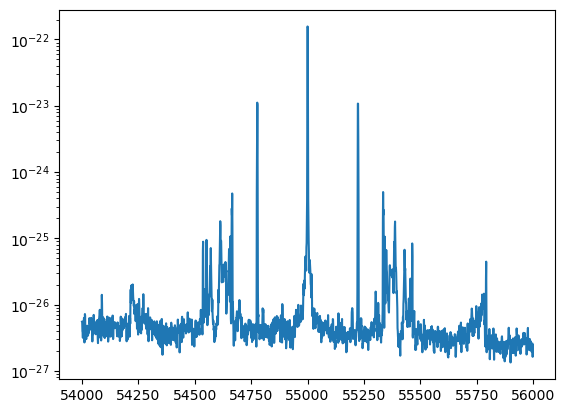

In [6]:
cal = 10**(-15)*0.75 # Matching to Yu-Han's calibration
lb = 54000
ub = 56000
plt.plot(PSD[0][lb:ub], PSD[1][lb:ub]*cal)
plt.yscale('log')

In [75]:
freqs = [5500]
files = [0]
phases_pos = np.zeros((len(freqs), len(files)*10))
amps_pos = np.zeros((len(freqs), len(files)*10))

path = r'D:\Lab Data\lorentz_force\sphere20250507\20250519\2.5 V\Background\tt'
files = np.linspace(0, 719, 720, dtype = int)
end = '.hdf5'
phases2 = np.zeros((len(freqs), len(files)*100))
amps2 = np.zeros((len(freqs), len(files)*100))
for n, file in enumerate(files):
    filename = path + str(file) + end
    data, attrs = au.load_data_lf(filename)
    for i in range(100):
        drive = data['channel_f'][i*10**5:(i+1)*10**5]
        drive2 = data['channel_d'][i*10**5:(i+1)*10**5]
        fft_drive = np.fft.rfft(drive)
        fft_drive2 = np.fft.rfft(drive2)
        for m, freq in enumerate(freqs):
            phase = np.unwrap([-np.pi, cmath.phase(fft_drive[freq])-cmath.phase(fft_drive2[freq])])
            amp = np.abs(fft_drive2[freq])/np.abs(fft_drive[freq])
            amps2[m, 100*n+i] = amp
            phases2[m, 100*n+i] = phase[1]

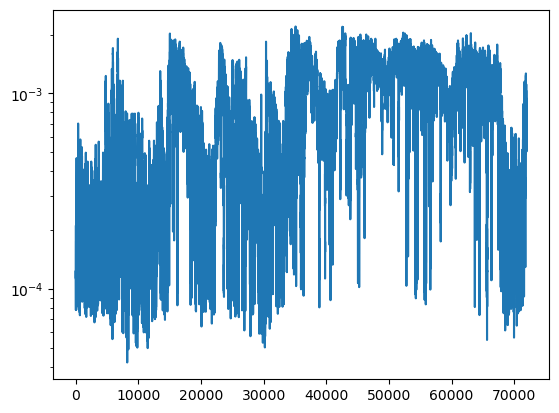

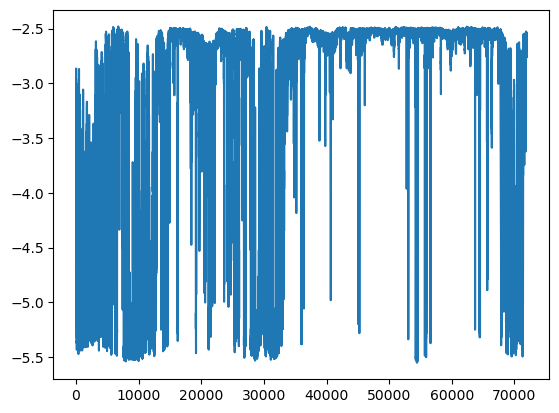

In [76]:
plt.plot(amps2[0])
plt.yscale('log')
plt.figure()
plt.plot(phases2[0])

In [115]:
# Allan deviation of background:

num_avrs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
devs = []
devs_std = []
for na in num_avrs:
    devs2 = []
    for j in range(10):
        samples = np.zeros(int(len(amps2[0])/na/10))
        for m, i in enumerate(range(int(len(amps2[0])/na/10))):
            samples[m] = np.mean(amps2[0][i*na+j*len(samples):(i+1)*na+j*len(samples)])
        devs2.append(np.sqrt(abs((1/(len(amps2[0]/na/10-1)))*sum((samples[1:]-samples[:-1])**2)/2)))
    devs.append(np.mean(devs2))
    devs_std.append(np.std(devs2)/np.sqrt(10))

In [116]:
len(amps2[0])/na/10

7.2

Text(0, 0.5, 'Allan deviation')

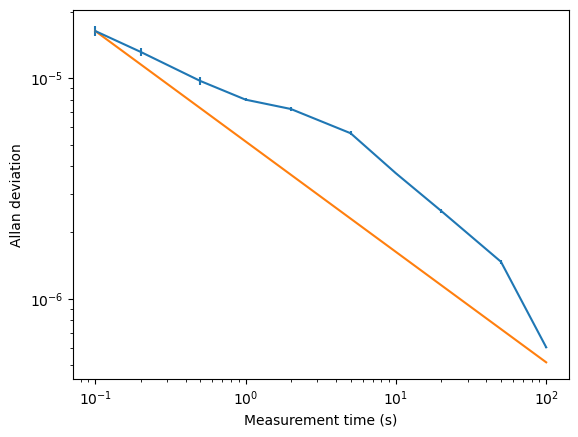

In [117]:
plt.errorbar(np.array(num_avrs)/10, devs, yerr = devs_std)
plt.plot(np.array(num_avrs)/10, devs[0]*1/np.sqrt(num_avrs))
#plt.plot(np.array(num_avrs)/10, np.sqrt(20/np.array(num_avrs)))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Measurement time (s)')
plt.ylabel('Allan deviation')

In [97]:
# Allan deviation of background:

num_avrs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
devs = []
for na in num_avrs:
    samples = np.zeros(int(len(amps2[0])/na))
    print(len(samples))
    for m, i in enumerate(range(int(len(amps2[0])/na))):
        samples[m] = np.mean(amps2[0][i*na:(i+1)*na])
    devs.append(np.sqrt(abs((1/(len(amps2[0]/na-1)))*sum((samples[1:]-samples[:-1])**2)/2)))

72000
36000
14400
7200
3600
1440
720
360
144
72
36
14
7


Text(0, 0.5, 'Allan deviation')

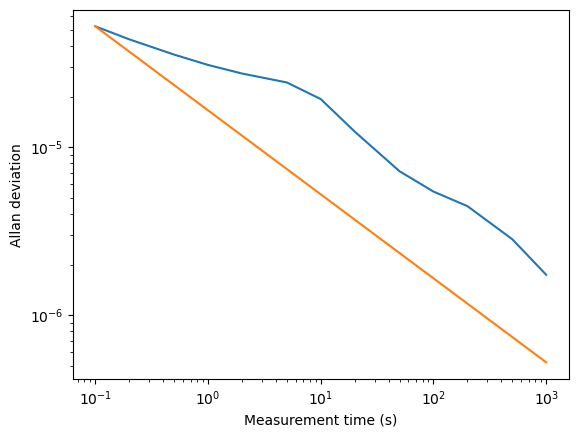

In [98]:
plt.plot(np.array(num_avrs)/10, devs)
plt.plot(np.array(num_avrs)/10, devs[0]*1/np.sqrt(num_avrs))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Measurement time (s)')
plt.ylabel('Allan deviation')